### Bump test
* performed on 10/28/20, repeated ? times.
* we examine force accuracy and repeatability

In [1]:
#from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

<Figure size 432x288 with 0 Axes>

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [3]:
start = Time('2020-11-04T17:03:00') #this is UTC
end = start+timedelta(minutes=6)

In [4]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

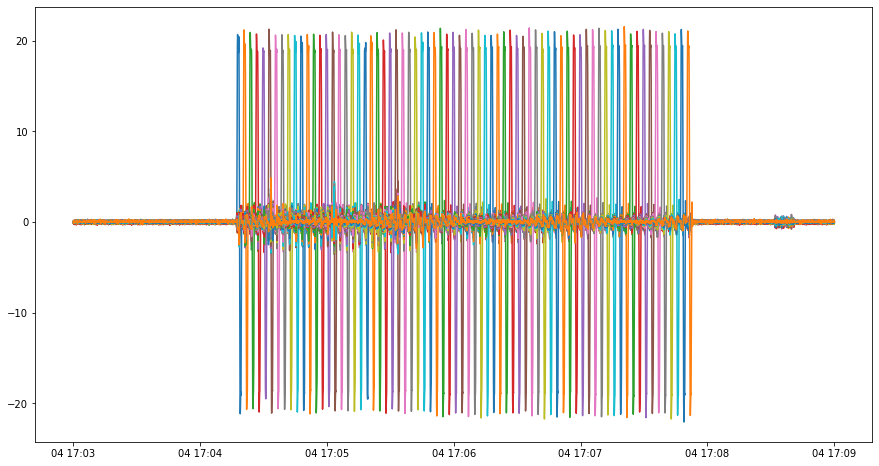

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(72):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['axialForceMeasured%d'%i]-df['axialForceMeasured%d'%i][0])

In [6]:
len(df)

7200

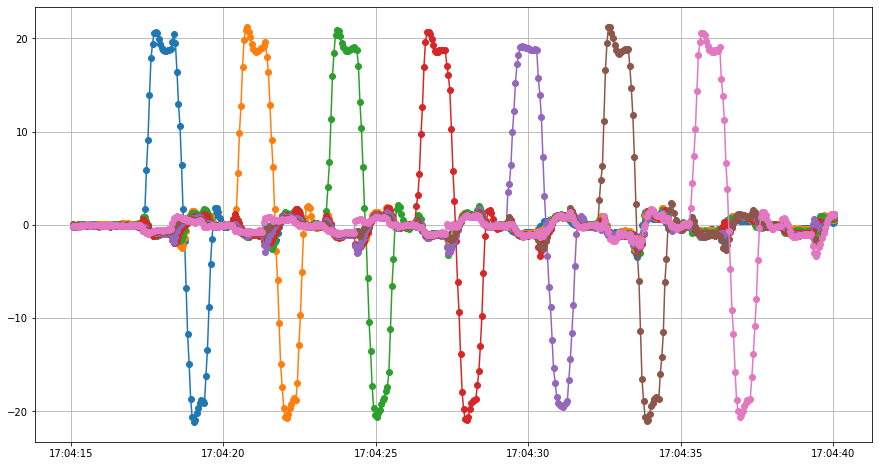

In [20]:
startIdx = np.argmax(df['axialForceMeasured0'] -df['axialForceMeasured0'][0]>10) - 50
fig, ax = plt.subplots(figsize=(15,8))
for i in range(7):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+500], unit='s'), 
             df['axialForceMeasured%d'%i][startIdx:startIdx+500]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()

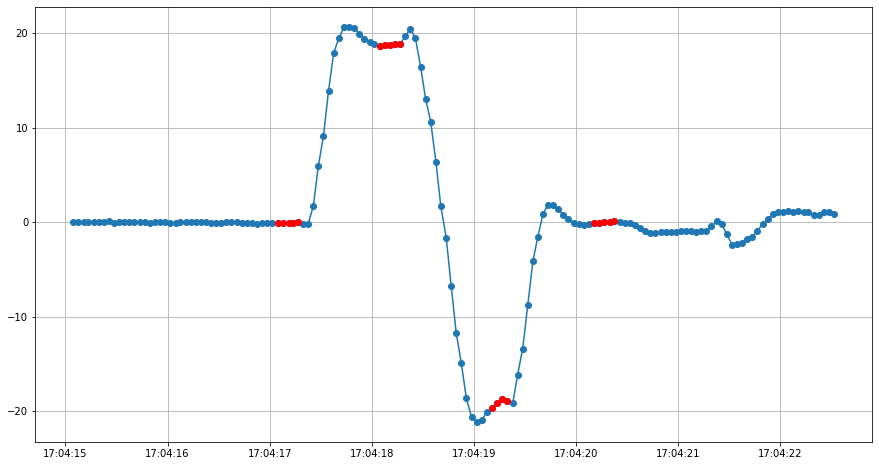

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+150], unit='s'), 
             df['axialForceMeasured%d'%i][startIdx:startIdx+150]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()
aa = np.array(df['axialForceMeasured%d'%i][startIdx:startIdx+150]-df['axialForceMeasured%d'%i][0])
i1 = np.argmax(aa>10)
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+10,i1+15)
idx2 = np.arange(i1+32, i1+36)
idx3 = np.arange(i1+52, i1+57)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro')

In [23]:
df = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

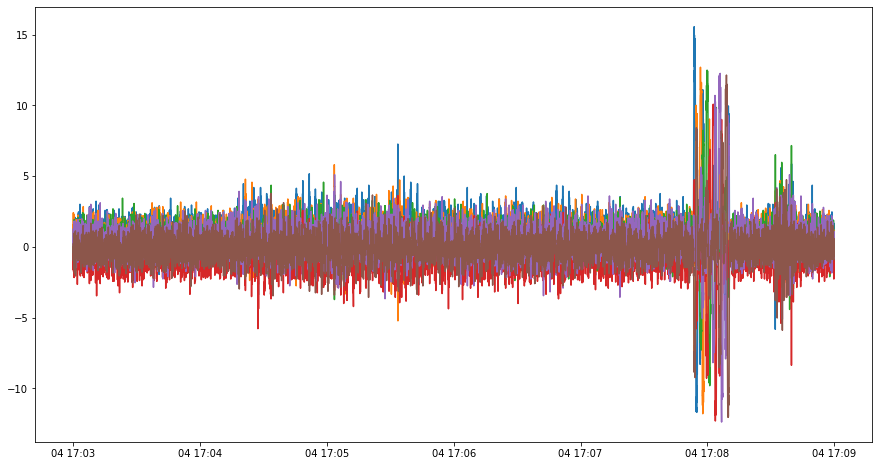

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)]-df['tangentLink%dDegForceMeasured'%(i*60)][0])

In [25]:
i = 0
startIdx = np.argmax(df['tangentLink%dDegForceMeasured'%(i*60)]-df['tangentLink%dDegForceMeasured'%(i*60)][0]>10) - 50

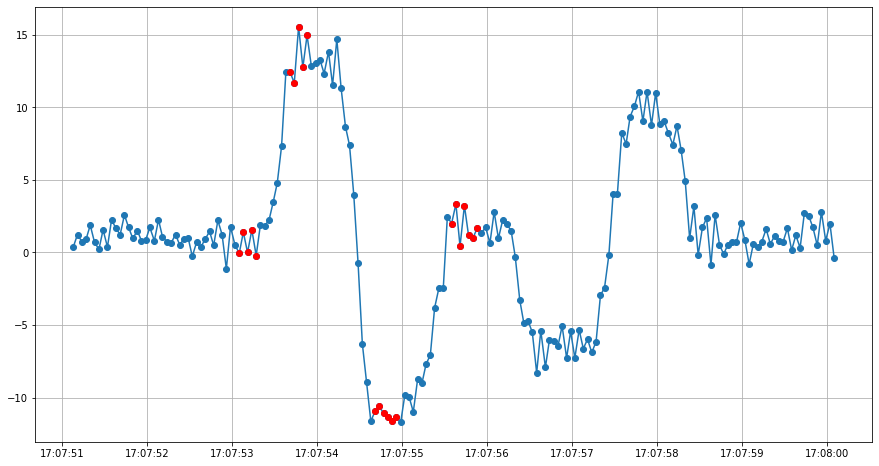

In [30]:
rr = 180
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0],'-o')
plt.grid()
aa = np.array(df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0])
i1 = np.argmax(aa>0.95*max(aa))-4
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+2,i1+7)
idx2 = np.arange(i1+22, i1+28)
idx3 = np.arange(i1+40, i1+47)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro');

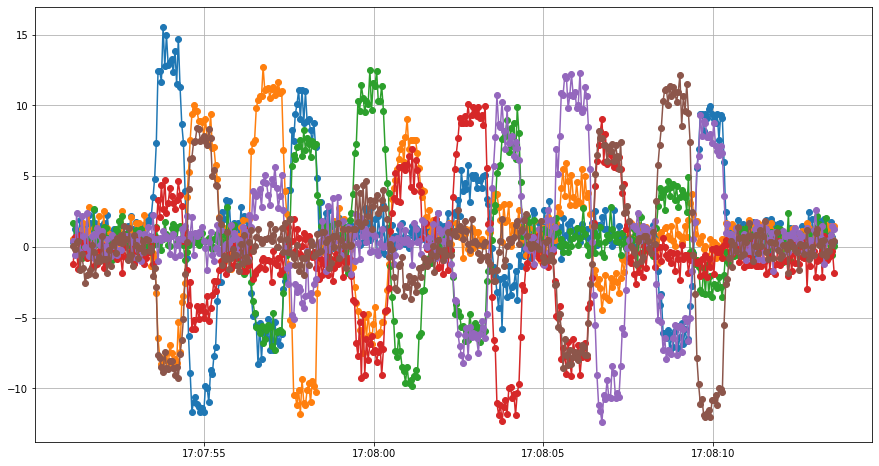

In [35]:
rr = 450
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(6):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0],'-o')
plt.grid()
aa = np.array(df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0])